In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["image.cmap"] = "gray"

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
print(f"The size of train images are: {train_images.shape}")
print(f"The size of train labels are: {train_labels.shape}")
print()
print(f"The size of test images are: {test_images.shape}")
print(f"The sie of test labels are: {test_labels.shape}")

The size of train images are: (60000, 28, 28)
The size of train labels are: (60000,)

The size of test images are: (10000, 28, 28)
The sie of test labels are: (10000,)


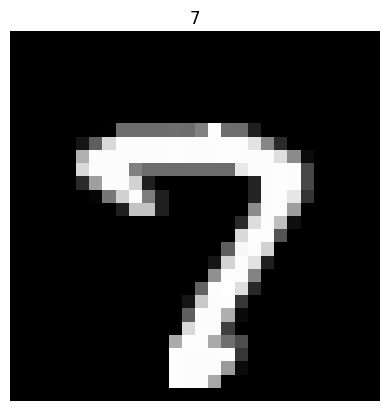

In [8]:
plt.imshow(train_images[52])
plt.title(train_labels[52])
plt.axis("off")
plt.show()